In [1]:
# 와인속성을 분석해서 품질 등급 예측
# 기술통계, 회귀분석, t-검증 p-value(귀무가설, 연구가설),
# 데이터 : 캘리포니아 어바인대학 제공  red / white
# 데이터 모델링
# 기술통계 : describe() , t-검증 scipy ttest_ind()
# 회귀분석 : statsmodels.fomula.api패키지의 ols()

# 품질등급 예측
# 독립변수(x)를 지정 -> 회귀분석모델적용->종속변수(y)인 품질 예측

#결과 시각화
# 히스토리그램, 회귀플롯을 이용한 시각화

In [2]:
# 회귀 분석
# 독립변수 x,와 종속변수 y간의 상호 연관성정도를 파악하기 위한 분석기법
# 변수간의(피처간의) 인과관계를 분석할때 많이 사용

# 단순회귀(독립변수 1개), 다중 회귀(독립변수가 여러개)
# 독립과 종속변수의 관계에 따라서 선형회귀와 비 선형회귀로 나눠짐
# y = ax1 + bx2 + cx3 + d

In [3]:
# T-검증
# 데이터로 찾은 평균으로 두 그룹에 차이가 있는지 확인하는 방법
# A와인품질이 1등급인지 2등급인지에따라서 가격에 차이가 있는지 확인할때

In [4]:
# 히스토그램
# 데이터값의 범위를 몇개의 구간으로 나누고 각 구간에 해당하는 값의 숫자나 상대적 빈도 크기를 차트로

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.read_csv('winequality-red.csv')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
# red와 white 와인을 합쳐서 wine 변수에 저장 type 컬럼생성해서 white, red 문자열을 저장
# index도 맞춰주세요

In [8]:
# info() 대략적인 컬럼의 상태
# describe()
# 헤더가 공백이 있어서 공백을 _ 로 대체
# 종속변수(quality) 의 값들은 어떤게 있는지 빈도수

In [9]:
df = pd.read_csv('winequality-red.csv')
df['type'] = 'red'
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [10]:
df2 = pd.read_csv('winequality-white.csv')
df2['type'] = 'white'
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [11]:
wine = pd.concat([df,df2])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [13]:
wine.reset_index(drop=True,inplace=True)

In [14]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [15]:
wine.columns = wine.columns.str.replace(' ','_')
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [16]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [17]:
# 두 그룹간의 describe()함수를 이용해서 비교
# 두 그룹별 품질의 기술통계
wine.groupby(['type'])['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [18]:
wine.groupby(['type'])['quality'].agg(['mean','std','count'])

,mean,std,count
type,,,
red,5.636023,0.807569,1599
white,5.877909,0.885639,4898


In [19]:
wine.groupby(['type'])['quality'].quantile(q=0.25)

type
red      5.0
white    5.0
Name: quality, dtype: float64

In [20]:
# t-검증
# scipy 라이브러리의 statsmodels 라이브러리 패키지를 사용
!pip install statsmodels

In [21]:
from scipy import stats
from statsmodels.formula.api import ols, glm

In [22]:
red_wine_quality = wine.loc[wine['type'] == 'red','quality']
white_wine_quality = wine.loc[wine['type'] == 'white','quality']

In [23]:
stats.ttest_ind(red_wine_quality,white_wine_quality,equal_var=False)
# p_value > 0.05 두 집단위 분산은 동질하다.
# p_value 가 5%(0.05) 작으면 두 모집단이 유의미한 차이가 있다고 본다

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [24]:
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats._stats_py:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which

In [25]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [26]:
# help(ols)
# 매개변수가 formula
wine.columns
formula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar'
formula += ' + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density'
formula += ' + pH + sulphates + alcohol'
formula

'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [27]:
# from sklearn.model_selection import train_test_split
wine = wine.sample(frac=1)

from random import sample
shuffle_index = sample(range(len(wine)),len(wine))
wine = wine.iloc[shuffle_index]
wine

index80 = int(len(wine)*0.8)
wine_80 = wine.iloc[:index80]
wine_20 = wine.iloc[index80:]
regression_result = ols(formula=formula,data=wine_80).fit()

### https://blog.minitab.com/en/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics

In [28]:
regression_result.summary()
# R-squared: 모델의 설명력을 나타내는 지표 0 ~ 1 0이면 모델이 데이틀 표현못한다.
# 0.4이상이면

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     186.2
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:35:24   Log-Likelihood:                -5750.3
No. Observations:                5197   AIC:                         1.152e+04
Df Residuals:                    5185   BIC:                         1.160e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7145     12.965      4.297      0.000      30.297      81.132
fixed_acidity            0.0653      0.017      3.813      0.000       0.032       0.099
volatile_acidity        -1.2673      0.087    -14.614      0.000      -1.437      -1.097
citric_acid             -0.1077      0.088     -1.218      0.223      -0.281       0.066
residual_sugar           0.0411      0.006      7.232      0.000       0.030       0.052
chlorides               -0.6963      0.365     -1.909      0.056      -1.411       0.019
free_sulfur_dioxide      0.0054      0.001      6.425      0.000       0.004       0.007
total_sulfur_dioxide    -0.0023      0.000     -7.221      0.000      -0.003      -0.002
density                -54.7950     13.235     -4.140      0.000     -80.742     -28.848
pH                       0.4307      0.101      4.269      0.000       0.233       0.628
sulphates                0.8080      0.086      9.350      0.000       0.639       0.977
alcohol                  0.2574      0.018     14.089      0.000       0.222       0.293
==============================================================================
Omnibus:                      114.748   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.688
Skew:                          -0.010   Prob(JB):                     1.82e-56
Kurtosis:                       4.089   Cond. No.                     2.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# 회귀분석 모델링.
# 새로운 품질의 등급을 예측
# difference 차집합
sample1 = wine[wine.columns.difference(['quality','type'])]
sample1 = sample1.iloc[:5]
sample1

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
4859,9.2,0.045,0.31,0.9986,7.4,39.0,3.10,14.5,0.50,193.0,0.19
1005,12.8,0.067,0.32,0.9928,6.8,4.0,3.36,1.8,0.55,8.0,0.36
2062,9.4,0.044,0.21,0.9932,6.8,15.0,3.17,2.2,0.39,68.0,0.32
2835,12.7,0.023,0.37,0.9902,6.8,19.0,3.14,3.4,0.53,87.0,0.32
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [30]:
sample1_predict =  regression_result.predict(sample1)
round(sample1_predict)
    

4859    6.0
1005    6.0
2062    5.0
2835    7.0
4       5.0
dtype: float64

In [31]:
wine['quality'].iloc[:5]

4859    6
1005    7
2062    6
2835    6
4       5
Name: quality, dtype: int64

In [32]:
test_cols = wine.columns.difference(['quality', 'type'])
wine_20.loc[:,test_cols]
predict_20 =  regression_result.predict(wine_20.loc[:,test_cols])
# 예측치
predict_20 = round(predict_20).astype(int)
predict_20

5873    6
5501    6
1648    6
762     5
3464    5
       ..
5027    7
2649    5
1050    6
2609    6
2656    5
Length: 1300, dtype: int32

In [33]:
# 실제 정답
wine_20['quality']

5873    6
5501    6
1648    5
762     6
3464    6
       ..
5027    6
2649    5
1050    5
2609    6
2656    5
Name: quality, Length: 1300, dtype: int64

In [34]:
# 정답을 맞춚 확율 
# 정확율.. accuracy 

In [35]:
(predict_20 == wine_20['quality']).mean()

0.53

In [36]:
# 1차 모델링 끝.....
# 2차 모델링... 1차모델링을 통해 개선점을 파악하고 개선해서 다시 모델링

In [37]:
# 시각화를 통해 데이터의 상태를 파악하고 개선해보기

###  부분회귀 플롯으로 시각화
    독립변수가 2개이상인경우 하나의 독립변수가 종속변수에 미치는 영향력을 시각화
    물론 상관지수를 구해서 해도 됨.

In [38]:
import statsmodels.api as sm

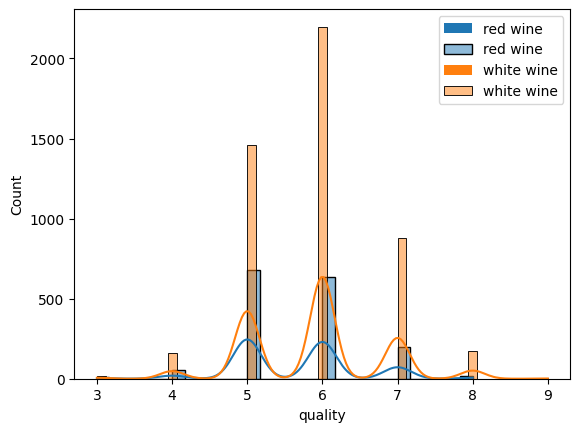

In [39]:
# 종속변수 시각화
# 와인유형에따라 품질등급
sns.histplot(red_wine_quality,label='red wine',kde=True)
sns.histplot(white_wine_quality,label='white wine',kde=True)
plt.legend()

In [40]:
# 독립변수가 2개 이상일때. 각 변수와 종속변수와의 관계
others = list(wine.columns.difference(['quality','fixed_acidity']))
others

['alcohol',
 'chlorides',
 'citric_acid',
 'density',
 'free_sulfur_dioxide',
 'pH',
 'residual_sugar',
 'sulphates',
 'total_sulfur_dioxide',
 'type',
 'volatile_acidity']

eval_env: 1


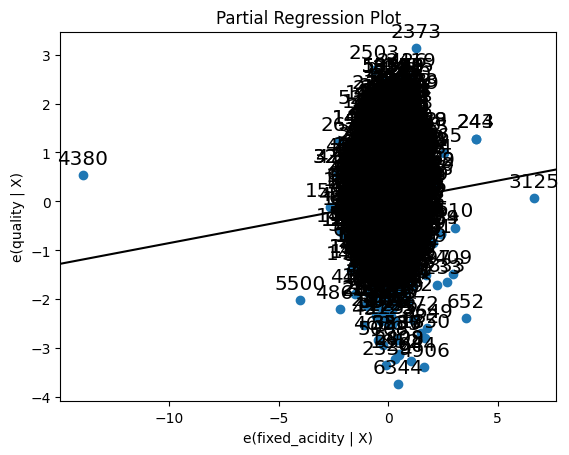

In [41]:
p,reside =  sm.graphics.plot_partregress('quality','fixed_acidity',others,data=wine,ret_coords=True)
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


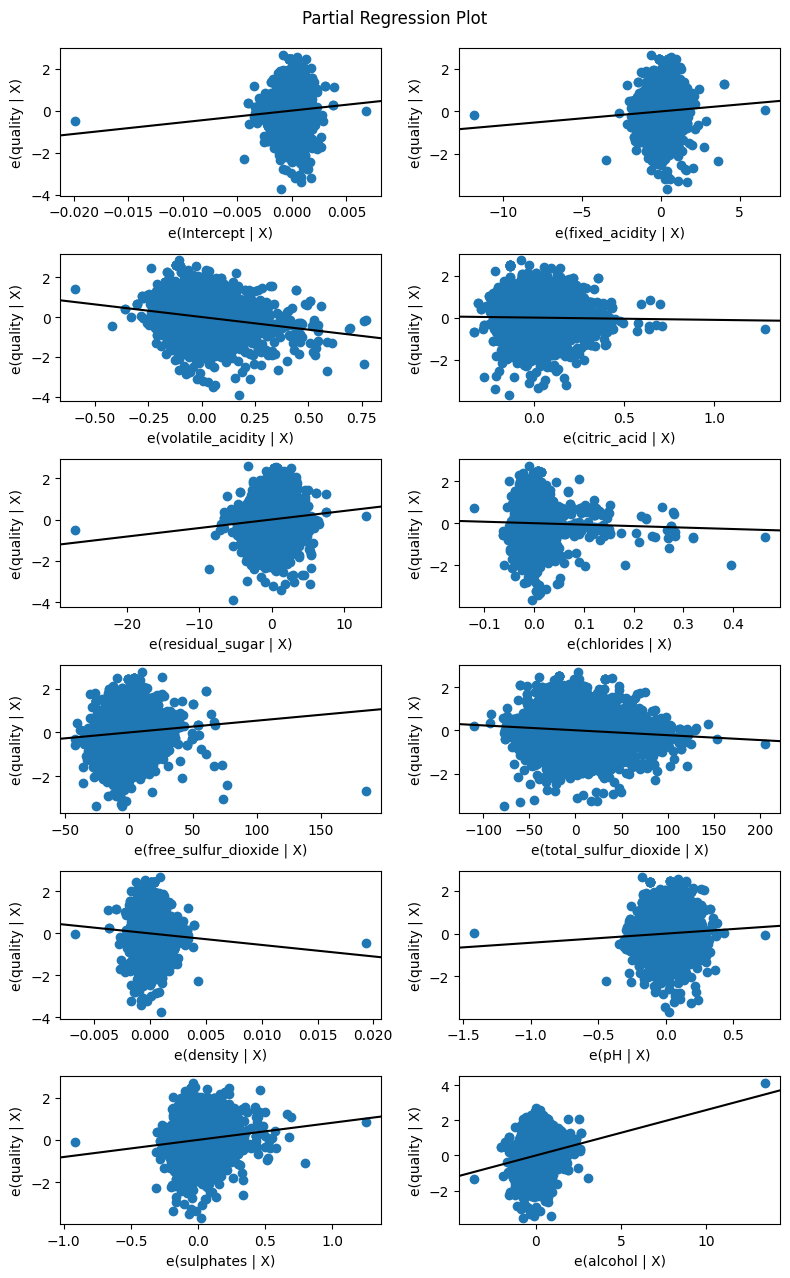

In [42]:
fig =  plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regression_result,fig=fig)
plt.show()

In [43]:
str = ""
recols = ['quality', 'alcohol','sulphates','residual_sugar','fixed_acidity','volatile_acidity']
recols2 = recols[1:]
for idx, value in enumerate(recols2):
    if idx == len(recols2)-1:
        str += value
        break
    str += value+ " + "
str    


'alcohol + sulphates + residual_sugar + fixed_acidity + volatile_acidity'

In [44]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [45]:
re_wine = wine.loc[:,recols]
re_wine.head()
# 2 차 모델링
index = int(len(re_wine)*0.8)
re_wine80 = re_wine.iloc[:index]
re_wine20 = re_wine.iloc[index:]
formula = 'quality ~ '+ str
formula
regression_result = ols(formula=formula,data=re_wine80).fit()

In [46]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     385.2
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:35:52   Log-Likelihood:                -5795.6
No. Observations:                5197   AIC:                         1.160e+04
Df Residuals:                    5191   BIC:                         1.164e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.2794      0.130     17.501      0.000       2.024       2.535
alcohol              0.3370      0.009     36.131      0.000       0.319       0.355
sulphates            0.7085      0.075      9.435      0.000       0.561       0.856
residual_sugar       0.0171      0.002      7.164      0.000       0.012       0.022
fixed_acidity       -0.0026      0.008     -0.311      0.756      -0.019       0.014
volatile_acidity    -1.3116      0.066    -19.733      0.000      -1.442      -1.181
==============================================================================
Omnibus:                       93.634   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.215
Skew:                           0.012   Prob(JB):                     3.01e-42
Kurtosis:                       3.939   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
re_wine20_predict = regression_result.predict(re_wine20)
re_wine20_predict = round(re_wine20_predict).astype(int)
re_wine20_predict

5873    6
5501    6
1648    6
762     5
3464    6
       ..
5027    7
2649    5
1050    6
2609    6
2656    5
Length: 1300, dtype: int32

In [48]:
(re_wine20['quality'] == re_wine20_predict).mean()

0.5323076923076923

In [49]:
#0.5438461538461539

In [50]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
4859,7.4,0.19,0.31,14.5,0.045,39.0,193.0,0.9986,3.10,0.50,9.2,6,white
1005,6.8,0.36,0.32,1.8,0.067,4.0,8.0,0.9928,3.36,0.55,12.8,7,red
2062,6.8,0.32,0.21,2.2,0.044,15.0,68.0,0.9932,3.17,0.39,9.4,6,white
2835,6.8,0.32,0.37,3.4,0.023,19.0,87.0,0.9902,3.14,0.53,12.7,6,white
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [51]:
# 개선 작업
df = pd.read_csv('winequality-red.csv')
df2 = pd.read_csv('winequality-white.csv')
wine = pd.concat([df,df2])
wine.columns = wine.columns.str.replace(' ','_')

shuffle_index = sample(range(len(wine)),len(wine))
wine = wine.iloc[shuffle_index]
remove_cols = ['type','quality']#,'citric_acid','chlorides','density']
train_cols = wine.columns.difference(remove_cols)
str = ""
for idx, value in enumerate(train_cols[1:]):    
    if idx == len(train_cols[1:])-1:
        str += value
        break
    str += value+ " + "
str   
formula = 'quality ~ '+ str
formula
index = int(len(wine)*0.8)
wine80 = wine.iloc[:index]
wine20 = wine.iloc[index:]

regression_result = ols(formula=formula,data=wine80).fit()
predict =  regression_result.predict(wine20)
predict = round(predict).astype(int)
(predict == wine20['quality']).mean()


0.51

In [52]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:35:52   Log-Likelihood:                -5824.4
No. Observations:                5197   AIC:                         1.167e+04
Df Residuals:                    5186   BIC:                         1.174e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              222.9159      7.308     30.502      0.000     208.589     237.243
chlorides               -0.3358      0.389     -0.863      0.388      -1.099       0.427
citric_acid              0.0391      0.091      0.431      0.666      -0.139       0.217
density               -224.4756      7.573    -29.640      0.000    -239.322    -209.629
fixed_acidity            0.2229      0.014     15.935      0.000       0.195       0.250
free_sulfur_dioxide      0.0065      0.001      7.667      0.000       0.005       0.008
pH                       1.2146      0.086     14.158      0.000       1.046       1.383
residual_sugar           0.1006      0.004     23.253      0.000       0.092       0.109
sulphates                1.2205      0.082     14.853      0.000       1.059       1.382
total_sulfur_dioxide    -0.0036      0.000    -12.151      0.000      -0.004      -0.003
volatile_acidity        -0.8840      0.084    -10.524      0.000      -1.049      -0.719
==============================================================================
Omnibus:                      114.981   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.642
Skew:                          -0.039   Prob(JB):                     5.07e-56
Kurtosis:                       4.082   Cond. No.                     1.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
wine80.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,7.241437,0.339602,0.319471,5.425063,0.055939,30.411295,115.659323,0.994715,3.217435,0.531637,10.484335,5.813931
std,1.308249,0.164319,0.143862,4.694684,0.034140,17.772830,56.908744,0.002950,0.159519,0.148166,1.189067,0.868917
min,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992380,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.000000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.600000,1.580000,1.230000,31.600000,0.611000,289.000000,440.000000,1.010300,4.010000,1.950000,14.200000,9.000000


In [54]:
# 변수들간의 상간관계
# 독립변수들간의 관계가 없어야 정확한 머신러닝이 가능
wine80.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.230671,0.327748,-0.122076,0.306039,-0.289637,-0.335163,0.468504,-0.249645,0.301154,-0.099176,-0.079899
volatile_acidity,0.230671,1.000000,-0.377339,-0.209528,0.389294,-0.353754,-0.412048,0.274852,0.252724,0.233276,-0.049125,-0.264658
citric_acid,0.327748,-0.377339,1.000000,0.135410,0.036930,0.116841,0.179833,0.095004,-0.324477,0.047408,-0.004847,0.090464
residual_sugar,-0.122076,-0.209528,0.135410,1.000000,-0.137610,0.413045,0.504674,0.536026,-0.267427,-0.195725,-0.367467,-0.033849
chlorides,0.306039,0.389294,0.036930,-0.137610,1.000000,-0.217419,-0.294420,0.372836,0.054230,0.401169,-0.255828,-0.197404
free_sulfur_dioxide,-0.289637,-0.353754,0.116841,0.413045,-0.217419,1.000000,0.724306,0.024893,-0.136983,-0.195933,-0.174478,0.060476
total_sulfur_dioxide,-0.335163,-0.412048,0.179833,0.504674,-0.294420,0.724306,1.000000,0.033596,-0.230340,-0.284014,-0.267851,-0.042271
density,0.468504,0.274852,0.095004,0.536026,0.372836,0.024893,0.033596,1.000000,0.011880,0.265554,-0.701743,-0.310468
pH,-0.249645,0.252724,-0.324477,-0.267427,0.054230,-0.136983,-0.230340,0.011880,1.000000,0.205206,0.119460,0.019119
sulphates,0.301154,0.233276,0.047408,-0.195725,0.401169,-0.195933,-0.284014,0.265554,0.205206,1.000000,-0.004619,0.043850


<AxesSubplot:>

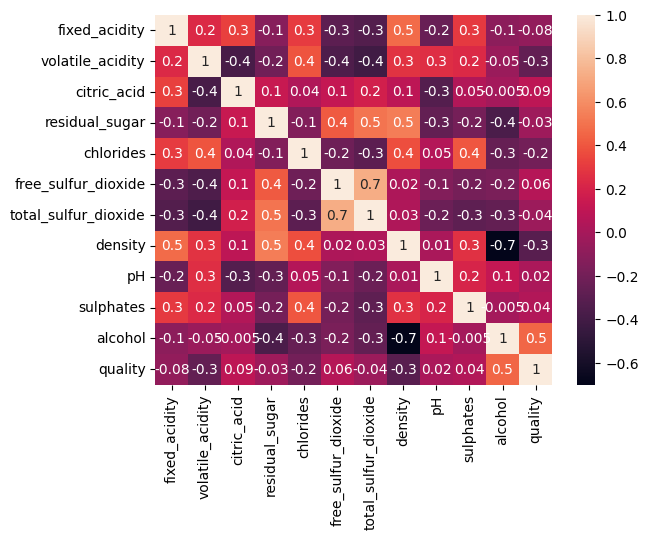

In [55]:
sns.heatmap(wine80.corr(),annot=True,fmt='.0g')

In [56]:
# 정규화
from sklearn.preprocessing import RobustScaler
r =  RobustScaler()
temp = pd.DataFrame( r.fit_transform(wine80.iloc[:,:-1]),columns=wine80.iloc[:,:-1].columns)
# temp.info()
# 적용
wine80 = wine80.reset_index(drop=True)
wine80 = pd.concat([temp,wine80['quality']],axis=1)
cols = wine80.columns.difference(['quality'])
fomula = ""
for idx, value in enumerate(cols):
    if idx == len(cols)-1:
        fomula += value
        continue
    fomula += value + ' + '
fomula = 'quality ~ ' + fomula
regress_result =  ols(formula=fomula,data=wine80).fit()     # 회귀모델
print(regress_result.summary())
temp2 = pd.DataFrame( r.fit_transform(wine20.iloc[:,:-1]),columns=wine20.iloc[:,:-1].columns)
temp2 = temp2.reset_index(drop=True)
wine20=wine20.reset_index(drop=True)
wine20 = pd.concat([temp2,wine20['quality']],axis=1)
predict = regress_result.predict(wine20)
(round(predict).astype(int) == wine20['quality']).mean()

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     199.0
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:35:53   Log-Likelihood:                -5728.3
No. Observations:                5197   AIC:                         1.148e+04
Df Residuals:                    5185   BIC:                         1.156e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.6628 

0.5130769230769231

In [57]:
wine20

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-0.500000,1.213793,-1.0625,-0.113208,1.16,0.000000,-1.053333,0.205995,0.954545,1.470588,0.388889,6
1,0.666667,-0.275862,0.0000,-0.249057,-0.24,-0.583333,-0.226667,-0.413079,0.227273,0.176471,0.055556,6
2,1.250000,0.110345,0.0625,-0.316981,-1.04,0.958333,0.386667,-0.962398,-1.272727,-1.058824,0.666667,5
3,0.750000,0.055172,0.4375,-0.264151,0.16,-0.541667,-0.306667,-0.151499,0.500000,0.705882,-0.166667,5
4,-1.416667,1.710345,-1.4375,0.596226,-0.12,0.166667,0.373333,-0.086104,0.545455,0.470588,-0.333333,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,-0.500000,-0.551724,-0.0625,-0.158491,-1.00,0.166667,-0.306667,-1.258856,-0.772727,0.235294,1.388889,7
1296,0.500000,1.710345,-1.6875,-0.188679,1.92,-0.166667,-0.266667,0.044687,0.636364,0.235294,-0.111111,5
1297,-0.083333,0.000000,1.2500,1.547170,0.24,0.791667,1.000000,0.567847,-0.545455,-0.294118,-0.500000,5
1298,-0.666667,-0.055172,-0.5000,-0.188679,-0.52,0.125000,-0.040000,-1.088828,0.681818,-0.352941,1.277778,6
